In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
dataset=pd.read_csv("../Datasets/startup_funding.csv")
df=dataset.copy()
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2367  2367  29/01/2015        Printvenue                NaN   
2368  2368  29/01/2015          Graphene                NaN   
2369  2369  30/01/2015    Mad Street Den                NaN   
2370  2370  30/01/2015         Simplotel                NaN   
2371  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [56]:
df.dropna(subset=["InvestmentType","InvestorsName","StartupName"],inplace=True)
df.reset_index(drop = True, inplace = True)
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2358  2367  29/01/2015        Printvenue                NaN   
2359  2368  29/01/2015          Graphene                NaN   
2360  2369  30/01/2015    Mad Street Den                NaN   
2361  2370  30/01/2015         Simplotel                NaN   
2362  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [57]:
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OlaCabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2358  2367  29/01/2015        Printvenue                NaN   
2359  2368  29/01/2015          Graphene                NaN   
2360  2369  30/01/2015    Mad Street Den                NaN   
2361  2370  30/01/2015         Simplotel                NaN   
2362  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [58]:
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)

df=df[(df["InvestmentType"]=="Crowd Funding") | (df["InvestmentType"]=="Seed Funding")]

print(df.head())

    SNo        Date    StartupName   IndustryVertical  \
2     2  02/08/2017   Leverage Edu  Consumer Internet   
3     3  02/08/2017           Zepo  Consumer Internet   
4     4  02/08/2017   Click2Clinic  Consumer Internet   
5     5  01/07/2017  Billion Loans  Consumer Internet   
11   11  06/07/2017         Minjar         Technology   

                                      SubVertical CityLocation  \
2   Online platform for Higher Education Services    New Delhi   
3                          DIY Ecommerce platform       Mumbai   
4                   healthcare service aggregator    Hyderabad   
5                   Peer to Peer Lending platform    Bangalore   
11                       Cloud Solutions provider    Bangalore   

                                        InvestorsName InvestmentType  \
2   Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...   Seed Funding   
3   Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...   Seed Funding   
4                      Narottam Thudi, Shire

In [64]:
investor_name=[]
startup_name=[]

for index,row in df.iterrows():
    i=row["InvestorsName"]
    temp=i.split(',')
    for j in temp:
        if(j!=""):
            investor_name.append(j.strip())
            startup_name.append(row["StartupName"])
newDf=pd.DataFrame({"InvestorsName":investor_name,"StartupName":startup_name})    
newDf=newDf.groupby("InvestorsName")["StartupName"].nunique()
newDf=newDf.sort_values(ascending=False).head(5)
print(newDf)

InvestorsName
Indian Angel Network        33
Rajan Anandan               23
LetsVenture                 16
Anupam Mittal               16
Group of Angel Investors    14
Name: StartupName, dtype: int64


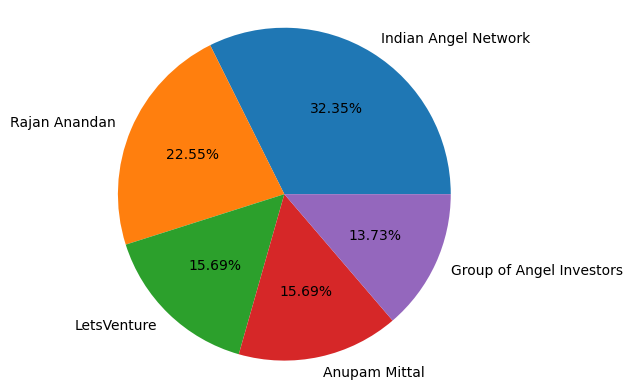

In [65]:
plt.pie(newDf,labels=newDf.index,autopct="%.2f%%")
plt.axis("equal")
plt.show()